In [1]:
import pandas as pd
# df=pd.read_csv("amazon.csv")
# df.tail()

In [2]:
# df1=df
# for i in range(len(df.index)):
#     df['product_name'].iloc[i]=df.iloc[i]['product_name']+str(i)
#     #print(df.iloc[i]['product_name']+str(i))
# df.to_csv("amazon2.csv", index=False)
# df1['product_name'].iloc[0]

In [3]:
df=pd.read_csv('amazon2.csv')
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue0,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd3,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

In [5]:
df.isna().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                          1435
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     651
product_information                              58
product_description                             651
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                 21
sellers                                        3082
dtype: int64

In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Predicting missing Categories of products with the help of description and name

In [7]:
df.amazon_category_and_sub_category[1]

'Hobbies > Model Trains & Railway Sets > Rail Vehicles > Trains'

In [8]:
df.amazon_category_and_sub_category[1].index(' >')

7

In [9]:
df.amazon_category_and_sub_category[1]

'Hobbies > Model Trains & Railway Sets > Rail Vehicles > Trains'

## Category Series

In [10]:
category = pd.Series(df['amazon_category_and_sub_category'].fillna('Buffer'))
category

0       Hobbies > Model Trains & Railway Sets > Rail V...
1       Hobbies > Model Trains & Railway Sets > Rail V...
2       Hobbies > Model Trains & Railway Sets > Rail V...
3       Hobbies > Model Trains & Railway Sets > Rail V...
4       Hobbies > Model Trains & Railway Sets > Rail V...
                              ...                        
9995    Hobbies > Collectible Figures & Memorabilia > ...
9996               Characters & Brands > Star Wars > Toys
9997    Novelty & Special Use > Novelty > Accessories ...
9998    Hobbies > Collectible Figures & Memorabilia > ...
9999               Characters & Brands > Star Wars > Toys
Name: amazon_category_and_sub_category, Length: 10000, dtype: object

In [11]:
category.unique()

array(['Hobbies > Model Trains & Railway Sets > Rail Vehicles > Trains',
       'Hobbies > Model Trains & Railway Sets > Lighting & Signal Engineering > Lamps & Lighting',
       'Hobbies > Model Trains & Railway Sets > Rail Vehicles > Locomotives',
       'Hobbies > Model Trains & Railway Sets > Lighting & Signal Engineering > Signal & Sound',
       'Hobbies > Model Trains & Railway Sets > Accessories > Recreational Activities',
       'Hobbies > Model Trains & Railway Sets > Lighting & Signal Engineering > Transformers & Decoders',
       'Buffer',
       'Characters & Brands > Thomas & Friends > Train Play > Wooden Thomas',
       'Hobbies > Model Trains & Railway Sets > Lighting & Signal Engineering > Control Moduls',
       'Hobbies > Model Trains & Railway Sets > Accessories > Landscaping',
       'Characters & Brands > Thomas & Friends > Train Play > Motor Road & Rail',
       'Characters & Brands > Hasbro',
       'Characters & Brands > Star Wars > Toys',
       'Characters & 

In [12]:
category.nunique()

256

In [13]:
def main_category(x):
    n=x.find(' >')
    if(n>0):
        return x[:n]
    return x

category=category.apply( lambda x: main_category(x))

Total categories:  44  


Arts & Crafts 802
Baby & Toddler Toys 106
Bags 4
Bedding & Linens 1
Buffer 690
Camping & Hiking 1
Car Parts 1
Characters & Brands 960
Cooking & Dining 4
Die-Cast & Toy Vehicles 1221
Dogs 2
Dolls & Accessories 371
Educational Toys 3
Electronic Toys 5
Fancy Dress 585
Figures & Playsets 1111
Games 941
Gardening 3
Handbags & Shoulder Bags 1
Hobbies 1464
Home Accessories 5
Indoor Lighting 2
Jams, Honey & Spreads 1
Jigsaws & Puzzles 274
Lab & Scientific Products 1
Laundry, Storage & Organisation 1
Medical Supplies & Equipment 1
Medication & Remedies 2
Men 1
Musical Toy Instruments 19
Novelty & Special Use 11
Novelty Jewellery 1
Office Supplies 6
Party Supplies 694
Pens, Pencils & Writing Supplies 7
Pretend Play 45
Puppets & Puppet Theatres 269
Sex & Sensuality 1
Sports Toys & Outdoor 372
Storage, Cleaning & Ring Sizers 1
Supporters' Gear 2
Sweets, Chocolate & Gum 2
Women 3
Worlds Apart 3


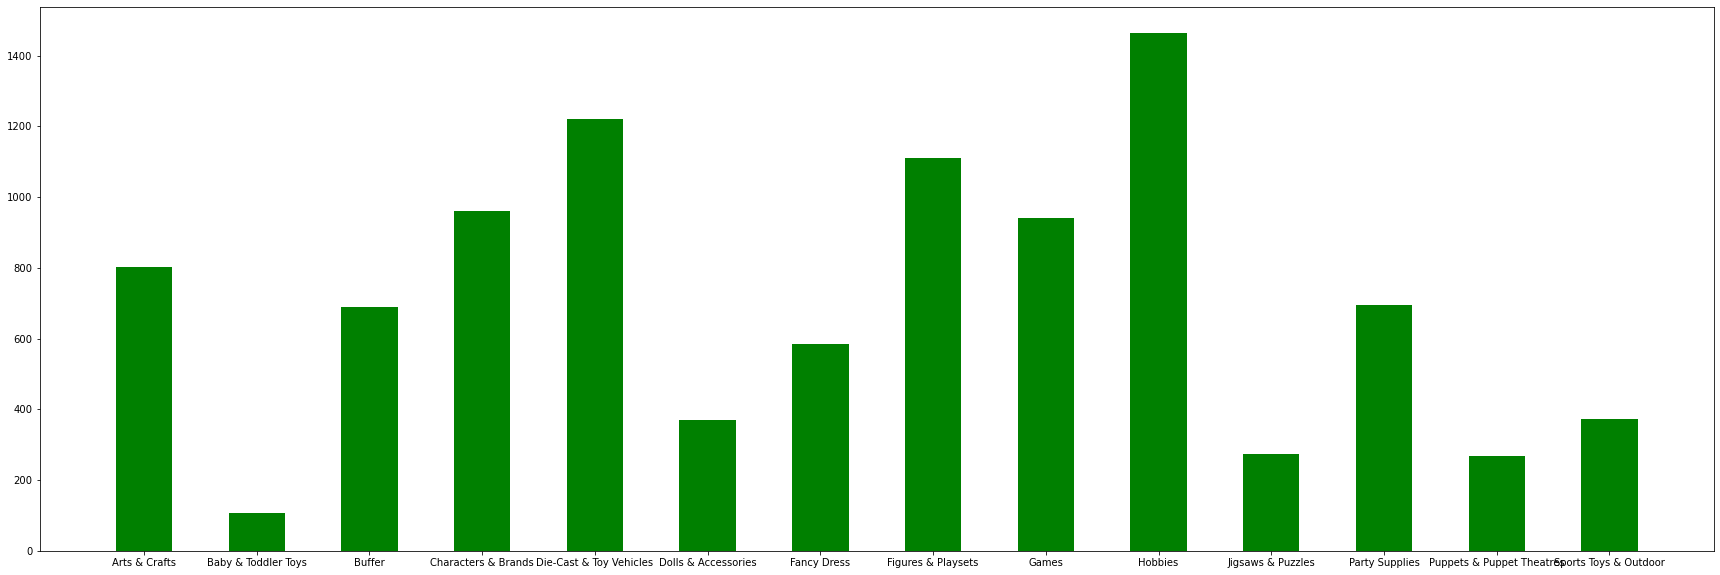

In [14]:
import matplotlib.pyplot as plt
def count_plot(arr):
    freq = {}
    plt.figure(figsize=(30,10))
    
    for item in category:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
 
    for i in sorted(freq):
        print(i,freq[i])
        if(freq[i]>100):
            plt.bar(i, freq[i], color='g',width=0.5)


n=category.unique()
print('Total categories: ',len(n),' \n\n')
count_plot(n)

In [15]:
category.index[71]


71

## Missing Category DF

In [16]:
c=df[['product_name','amazon_category_and_sub_category', 'description']]
c=c[df['amazon_category_and_sub_category'].isnull()]
c=c.dropna(subset=['description'])
c

,product_name,amazon_category_and_sub_category,description
71,Power Trains Auto Loader City71,NaN,Power City Trains Auto Loader City
199,Smasha Ballz Ninjaaah199,NaN,Product Description The Smasha-Ballz have inva...
200,Moomins - 6.5 Inch Moominpappa Soft Toy - 2005...,NaN,6.5 inch soft toy
201,Classic Cuddly Paddington Bear by Rainbow Desi...,NaN,Please take care of this bear... Cuddly Paddin...
202,Charlie Bears Rainbow Teddy Bear from the Char...,NaN,Rainbow is from the 2015 collection
...,...,...,...
9113,Mega Bloks Halo 97134 - UNSC Night Ops Gaussho...,NaN,"Product Description Establish your army, build..."
9333,Fajiabao Educational Classic Electronic Racing...,NaN,Colour Name:style A High emulation car，props (...
9434,Hungry Hungry Hippos Elefun & Friends Board Ga...,NaN,Style Name:Friends-Board Game Hungry Hungry Hi...
9664,Friendship Charm Bracelet Jewellery Making Kit...,NaN,PIPPIN FRIENDSHIP CHARM BRACELET KIT - HEARTS ...


In [17]:
missing=c

## Category DF

In [18]:
category_df=df[['product_name','description','amazon_category_and_sub_category']].fillna('Buffer')
category_df.isnull().sum()

product_name                        0
description                         0
amazon_category_and_sub_category    0
dtype: int64

In [19]:
def main_category(x):
    n=x.find(' >')
    if(n>0):
        return x[:n]
    return x

category=category.apply( lambda x: main_category(x))
category_df['amazon_category_and_sub_category']=category

In [20]:
category_df.head()

,product_name,description,amazon_category_and_sub_category
0,Hornby 2014 Catalogue0,Product Description Hornby 2014 Catalogue Box ...,Hobbies
1,FunkyBuys® Large Christmas Holiday Express Fes...,Size Name:Large FunkyBuys® Large Christmas Hol...,Hobbies
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Hobbies
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd3,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Hobbies
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Product Description Hornby RailRoad 0-4-0 Gild...,Hobbies


## Classification

In [21]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue0,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd3,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


## Vectorization

In [22]:
tfidf = TfidfVectorizer(stop_words='english')

overview_matrix = tfidf.fit_transform(category_df['description'])
overview_matrix2 = tfidf.fit_transform(category_df['product_name'])

similarity_matrix = linear_kernel(overview_matrix,overview_matrix)
similarity_matrix2 = linear_kernel(overview_matrix2,overview_matrix2)

print('\n\n similarity_matrix2: \n',similarity_matrix)

mapping = pd.Series(category_df.index,index = category_df['product_name'])
mapping



 similarity_matrix2: 
 [[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.15582528 ... 0.         0.         0.        ]
 [0.         0.15582528 1.         ... 0.         0.00685409 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.01698311 0.        ]
 [0.         0.         0.00685409 ... 0.01698311 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


product_name
Hornby 2014 Catalogue0                                                                                                        0
FunkyBuys® Large Christmas Holiday Express Festive Train Set (SI-TY1017) Toy Light / Sounds / Battery Operated & Smoke1       1
CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT ENGINE BOXED BOYS KIDS BATTERY2                                                   2
HORNBY Coach R4410A BR Hawksworth Corridor 3rd3                                                                               3
Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam Locomotive Model4                                                              4
                                                                                                                           ... 
Batman 1966 TV Series Action Figures - The Riddler9995                                                                     9995
Star Wars Costume, Kids Stormtrooper Costume Style 4, Medium, HEIGHT 4' 2" - 4' 6"9996     

In [43]:
def category_pred(df_input):
    
    def description(df_input):
        df_index = mapping[df_input]
        similarity_score = list(enumerate(similarity_matrix[df_index]))
        similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
        similarity_score = similarity_score[1:2]
#         print(similarity_score)
        df_indices = [i[0] for i in similarity_score]
        return (similarity_score)
    
    def name(df_input):
        df_index = mapping[df_input]
        similarity_score = list(enumerate(similarity_matrix2[df_index]))
        similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
        similarity_score = similarity_score[1:2]
#         print(similarity_score)
        df_indices = [i[0] for i in similarity_score]
        return (similarity_score)
    
    df_index = mapping[df_input]
    
    d=description(df_input)
    n=name(df_input)
    
    if d[0][1]<n[0][1]:
        index=n[0][0]
    else:
        index=d[0][0]
#     print(df_input,mapping[df_input],category_df['product_name'].iloc[df_index])

#     def fill_cat(index):
#        df['amazon_category_and_sub_category'].iloc[df_index]=df['amazon_category_and_sub_category'].iloc[index]
#        print(df_input,' ',category_df['amazon_category_and_sub_category'].iloc[index],'\n\n')

        
#     fill_cat(index)
    return(category_df['amazon_category_and_sub_category'].iloc[index])

In [35]:
print(category_pred('Smasha Ballz Ninjaaah199'))

[(334, 0.7292917871174842)]
[(334, 0.524477782642056)]
['Smasha Ballz Ninjaaah199', 'Buffer']


In [25]:
category_df.iloc[6199]

product_name                        Hollywood/Movie Night Theme Party - Giant Bann...
description                                                                    Buffer
amazon_category_and_sub_category                                       Party Supplies
Name: 6199, dtype: object

In [26]:
category_df.iloc[2206]

product_name                                         Parrot Bebop Drone 2 (White)2206
description                         Colour Name:White and Black Product Descriptio...
amazon_category_and_sub_category                                              Hobbies
Name: 2206, dtype: object

In [36]:
mapping.index[2206]

'Parrot Bebop Drone 2 (White)2206'

In [28]:
for i in missing['product_name']:
    category_pred(i)

[(4281, 0.43454639229678804)]
[(5765, 0.694683115671579)]
Power Trains Auto Loader City71   Hobbies 


[(334, 0.7292917871174842)]
[(334, 0.524477782642056)]
Smasha Ballz Ninjaaah199   Buffer 


[(4425, 0.480042110436164)]
[(343, 0.1986916923002174)]
Moomins - 6.5 Inch Moominpappa Soft Toy - 20056200   Characters & Brands 


[(4602, 0.24439927390811617)]
[(9267, 0.2202323971846143)]
Classic Cuddly Paddington Bear by Rainbow Designs (colours vary)201   Puppets & Puppet Theatres 


[(5856, 0.40418390100612506)]
[(340, 0.730603229303472)]
Charlie Bears Rainbow Teddy Bear from the Charlie Bears 2015 Plush Collection202   Buffer 


[(4413, 0.31130319649845933)]
[(282, 0.37277130735909597)]
Yoohoo & Friends - Bush Baby with Pink Love Heart Pink Eyes Plush Soft Toy203   Fancy Dress 


[(7958, 0.7351948211235363)]
[(7958, 0.4982713514235344)]
Monchhichi 45 cm Classic Boy204   Dolls & Accessories 


[(4509, 0.9703640090957549)]
[(4509, 0.5828614969966651)]
Aurora 5 inch Yoohoo and Friends Beave

[(4390, 0.34757772817837135)]
[(320, 0.3204594637913276)]
Flamingo Soft Toy - Suma Collection277   Hobbies 


[(4376, 0.8350256715844282)]
[(4376, 0.5315202558259169)]
WWF Wolf plush stuffed soft animal toy278   Buffer 


[(394, 0.7983715504351533)]
[(345, 0.33721470216105687)]
Melissa & Doug Jack Russell Terrier Plush Toy279   Buffer 


[(3453, 0.3416272062500436)]
[(213, 0.28115630013736964)]
Personalised meerkat plush toy with Happy holidays T-Shirt280   Die-Cast & Toy Vehicles 


[(367, 0.34676248884401)]
[(315, 0.46749516147118425)]
Keel Toys 110 cm Elephant281   Buffer 


[(4413, 0.39535609638436586)]
[(6143, 0.2250085098138921)]
30cm Cuddlekins Triceratops from Wild Republic283   Buffer 


[(4386, 1.0000000000000002)]
[(4404, 0.7083800998877919)]
Official Nintendo Super Mario Plush Series Stuffed Toy - 10" Cat Luigi284   Buffer 


[(350, 0.5401119774944725)]
[(350, 0.3115144354925883)]
TY Chinook the Bear Canada Excl. Beanie Baby285   Buffer 


[(307, 0.29411728961351424)]
[(104

[(4548, 0.38535077012266206)]
[(7146, 0.32107670630441726)]
Union Jack Cute Hoodie Teddy Bear362   Buffer 


[(4413, 0.44542346434648783)]
[(1360, 0.25144569159266067)]
Plush owl with I Love my man T-shirt363   Buffer 


[(224, 0.28624589570506564)]
[(224, 0.6257181863006163)]
Latitude Enfant 320622 Simon The Lion364   Buffer 


[(7069, 0.37527211038213804)]
[(6573, 0.2542304005237959)]
Despicable Me 2 Electronic Soft Toy - Fluffy Unicorn365   Figures & Playsets 


[(5698, 0.3083780784723274)]
[(8104, 0.4164347722755656)]
Teddy in a Tin - Sleepy Bear - Gift in a Tin from Apples to Pears366   Dolls & Accessories 


[(315, 0.5445393952303731)]
[(308, 0.32125314584197784)]
Keel Toys 20cm Sitting Panda367   Buffer 


[(2268, 0.1673400300257085)]
[(6035, 0.21792377595913978)]
Animagic My Tender Care Twin Puppies368   Figures & Playsets 


[(8973, 0.13847766705455694)]
[(4393, 0.381155566735585)]
Steiff 035807 Will Cinnamon Teddy Bear Limited Edition of 1500369   Buffer 


[(4470, 0.64298868

[(620, 0.4553506519256563)]
[(604, 0.32689126194140555)]
Advent Calendar - Where's Wally - Lots Of Santas - Glitter Varnish Finish687   Buffer 


[(790, 0.27809003032064344)]
[(789, 0.4859419174357227)]
PERSONALISED EMBROIDERED STRIPEY CHRISTMAS STOCKING WITH NAME excluaive to 1stclassgifts st3690   Buffer 


[(8017, 0.22178882102699884)]
[(789, 0.37888647397375563)]
PERSONALISED GIANT SANTA SACK 3d Applique Embroidered with Name in GOLD or WHITE thread691   Buffer 


[(676, 0.6684583759115859)]
[(676, 0.3886691052224479)]
POLLY POCKET Advent Calendar 2011 Floor display, from 4 years (X2456)692   Buffer 


[(674, 0.32952622228233597)]
[(3108, 0.19701526415844603)]
Christmas Magical Reindeer Food Oats Glitter Festive Santa Craft *Rudlolf Charm*696   Buffer 


[(668, 0.788233808046622)]
[(6053, 0.35852554594450686)]
Melissa & Doug Countdown to Christmas Wooden Advent Calendar697   Arts & Crafts 


[(699, 1.0)]
[(635, 0.6397393627420775)]
Traditional A4 Card Advent Calendar Deluxe - Nosta

[(6496, 0.29535475354093643)]
Figure-rise 6 - Accel World Black Lotus Plastic Model Construction Kit2406   Hobbies 


[(2419, 0.4055091751032169)]
[(2471, 0.4603698914348821)]
LEGO Indiana Jones: Colonel Dovchenko Keychain2408   Buffer 


[(1167, 0.38418525632574796)]
[(2509, 0.26306282641842715)]
LEGO Legends of Chima 70105: Nest Dive2409   Figures & Playsets 


[(2484, 0.27123409398668225)]
[(2593, 0.36991700808535055)]
Mega Bloks Halo 97964 - Covenant Scarab2412   Buffer 


[(788, 0.13777602854817858)]
[(2520, 0.37975491725168253)]
LEGO Architecture 21020: Trevi Fountain2413   Buffer 


[(3980, 0.3871824148660056)]
[(4085, 0.3500353085130837)]
Playmobil 5107 Country Speckled Horse with Stall2416   Figures & Playsets 


[(943, 0.30465514307287367)]
[(805, 0.4218480229199023)]
Massey Ferguson 5430 Tractor and Trailer Construction Kit2417   Die-Cast & Toy Vehicles 


[(2507, 0.24912711844500338)]
[(2509, 0.25290141442927516)]
LEGO Chima 70230: Ice Bear Tribe Pack2418   Buffer 


[(2408


[(2475, 0.5748304186599784)]
[(2475, 0.29790590968269715)]
LEGO Chima 70151: Frozen Spikes2509   Buffer 


[(7006, 0.14380964579514288)]
[(2507, 0.26699151072780897)]
LEGO Ninjago 70605: Misfortune's Keep Mixed2510   Buffer 


[(6592, 0.26752769879347904)]
[(8827, 0.23775493352022659)]
PLUS PLUS 600 pieces Pastel set2511   Arts & Crafts 


[(2448, 0.8694245031335187)]
[(4041, 0.33595268145111135)]
Playmobil 4912 Dragon Knights Duel2512   Buffer 


[(2566, 0.3733853215645423)]
[(2521, 0.27570044536336824)]
LEGO Technic 42027: Desert Racer2513   Buffer 


[(2547, 0.627089195177436)]
[(6929, 0.5583730793359798)]
Lite Brix Sea Patrol2515   Buffer 


[(9563, 0.26729716969378187)]
[(8217, 0.26598405049168344)]
LEGO Super Heroes 6858: Catwoman Catcycle City Chase2516   Hobbies 


[(3186, 0.29266914652642556)]
[(5690, 0.36047570805106544)]
Warrior Pack (Assortment)2517   Hobbies 


[(9719, 0.16432905953928983)]
[(6986, 0.23307062830543407)]
LEGO Nexo Knights 70334: Ultimate Beast Master Mixed

[(2591, 0.2626130811969565)]
Playmobil 5530 City Life Vets Pet Examination Room3977   Buffer 


[(4030, 0.4505566477252216)]
[(4073, 0.37529168916927325)]
Playmobil 6039 Royal Lion Knight's Catapult4051   Figures & Playsets 


[(4059, 0.59296283728512)]
[(4013, 0.3267581540118979)]
Playmobil 6003 Knights Great Dragon4069   Figures & Playsets 


[(4053, 0.31525067497923526)]
[(4053, 0.4293258941255105)]
Playmobil 6160 Knights King's Treasure Guard4081   Figures & Playsets 


[(4149, 0.5491992417227876)]
[(4052, 0.21158826869467642)]
Playmobil 6001 Hawk Knight's Castle4089   Figures & Playsets 


[(4387, 0.36873702892926563)]
[(297, 0.3299793155255268)]
Plush Soft Toy Yorkshire Terrier by Hansa. 36cm. 59094361   Buffer 


[(4509, 0.49758179907927574)]
[(205, 0.44385220199247477)]
Aurora World 3-inch Yoohoo and Friends Loonee Snow Owl Mini Key Clip4362   Buffer 


[(353, 0.25677622796859556)]
[(4453, 0.24153142124315474)]
MCDONALDS TOYS MAGIC ROUNDABOUT ERMINTRUDE THE COW 11CM BEANIE PLUS

[(302, 0.305444425950265)]
Steiff 33cm Moritz Teddy Bear (Chestnut)4446   Buffer 


[(5776, 0.6568466675917675)]
[(4367, 0.2553511862653735)]
Plush Soft Toy Lying Husky Dog by Dowman Soft touch. 32cm. RA3514450   Hobbies 


[(1478, 0.520318801451642)]
[(4407, 0.4739275190299652)]
Moshi Monsters Moshling Talking Plush Iggy4451   Arts & Crafts 


[(4452, 1.0)]
[(4518, 0.5497823283378818)]
Halloween Pumpkin Outfit Teddy Bear Clothes to fit Build a Bear 15-16 inches (40cm)4452   Buffer 


[(4400, 0.3541741971887641)]
[(317, 0.26243278993421604)]
Pokemon Flareon Plush Soft Toy 11cm High New Arrival4453   Buffer 


[(373, 0.4936856736926551)]
[(8429, 0.3278467333412276)]
TY Pellet the Hamster Beanie Baby4454   Buffer 


[(2214, 0.2894514311916315)]
[(4497, 0.4531498474373248)]
Ty Beanie Boos Phantom - Ghost4455   Buffer 


[(8036, 0.31300280977951744)]
[(4404, 0.4728268437198686)]
super mario bros t+ - mario official plush 9 inch4456   Buffer 


[(4413, 0.26183342600060155)]
[(6866, 0.205591

[(358, 0.963668390529143)]
[(357, 0.5063363879406535)]
Me to You 12-Inch Tatty Teddy (Grey)4530   Buffer 


[(7479, 0.16612999440741194)]
[(4402, 0.304610636793895)]
HOOTY FRIENDS Pig Heatable Soft Toy4531   Buffer 


[(269, 0.33085538172695633)]
[(7460, 0.37162531485155165)]
Doctor Who Tardis Stress Toy4532   Jigsaws & Puzzles 


[(4538, 0.17837981660186716)]
[(261, 0.33863234623700733)]
TY Garfield 4-H Beanie Baby4533   Buffer 


[(3319, 0.08977013427594417)]
[(8868, 0.2131943111397425)]
Musical Leprechaun4534   Figures & Playsets 


[(4479, 0.5894766337430428)]
[(4479, 0.3388367349709591)]
Pinky the Guinea Pig - 5" Original Beanie4535   Buffer 


[(320, 0.5205941574383073)]
[(320, 0.5133017795494809)]
Plush Soft Toy Koala Bear from The Suma Collection by Ravensden. 20cm. FRS039A4536   Buffer 


[(4389, 0.3941895349379442)]
[(4389, 0.5650102832714802)]
MY LITTLE PONY - MY LITTLE PONY PLUSH 12 INCHES - APPLE BLOOM 25 cm4538   Buffer 


[(3955, 0.19374891477441764)]
[(298, 0.2206874551

Playmobil 4324 Furnished School Building6943   Buffer 


[(2412, 0.24460210380965383)]
[(2593, 0.3386371421828249)]
Halo "Mega Bloks Scorpion's Sting" Building Set (Grey)6944   Buffer 


[(2662, 0.37122939847921205)]
[(719, 0.3284197421999419)]
LEGO Santa Minifigure - LEGO Holiday Father Christmas figure with Present Sack6945   Hobbies 


[(634, 0.3022931821966399)]
[(2878, 0.33912001939895825)]
Lego 60009 City Helicopter Arrest6946   Buffer 


[(9396, 0.3611197549647674)]
[(8217, 0.5638110325010022)]
Doc Ock Truck Heist LEGO® Super Heroes Set 760156947   Figures & Playsets 


[(2548, 0.24687701427201653)]
[(2548, 0.5191982035556237)]
Mega Bloks Call of Duty Motorbike Breakout Collector Construction Set6948   Buffer 


[(8869, 0.2744950310888275)]
[(6904, 0.2865359511566514)]
LEGO Atlantis 7985: City of Atlantis6950   Buffer 


[(9701, 0.37615493439794323)]
[(9951, 0.28999188562237666)]
Viga Wooden 24 Piece Tool Kit6951   Arts & Crafts 


[(7786, 0.39089379202652674)]
[(9817, 0.1982007

# Testing

In [52]:
mapping['FunkyBuys® Large Christmas Holiday Express Festive Train Set (SI-TY1017) Toy Light / Sounds / Battery Operated & Smoke1']

1

In [60]:
match=0
mismatch=0
freq2={}
for i in category_df['product_name'][1:10000]:
    index=mapping[i]
    s=category_df['amazon_category_and_sub_category'].iloc[index]
    ans=category_pred(i)
    
    if s==ans:
        match+=1
    else:
        mismatch+=1
        
    if s in freq2:
        freq2[s]+=1
    else:
        freq2[s]=1
    #print(s,ans)

In [61]:
print(match,mismatch)

6993 3006


Arts & Crafts 802
Baby & Toddler Toys 106
Bags 4
Bedding & Linens 1
Buffer 690
Camping & Hiking 1
Car Parts 1
Characters & Brands 960
Cooking & Dining 4
Die-Cast & Toy Vehicles 1221
Dogs 2
Dolls & Accessories 371
Educational Toys 3
Electronic Toys 5
Fancy Dress 585
Figures & Playsets 1111
Games 941
Gardening 3
Handbags & Shoulder Bags 1
Hobbies 1463
Home Accessories 5
Indoor Lighting 2
Jams, Honey & Spreads 1
Jigsaws & Puzzles 274
Lab & Scientific Products 1
Laundry, Storage & Organisation 1
Medical Supplies & Equipment 1
Medication & Remedies 2
Men 1
Musical Toy Instruments 19
Novelty & Special Use 11
Novelty Jewellery 1
Office Supplies 6
Party Supplies 694
Pens, Pencils & Writing Supplies 7
Pretend Play 45
Puppets & Puppet Theatres 269
Sex & Sensuality 1
Sports Toys & Outdoor 372
Storage, Cleaning & Ring Sizers 1
Supporters' Gear 2
Sweets, Chocolate & Gum 2
Women 3
Worlds Apart 3


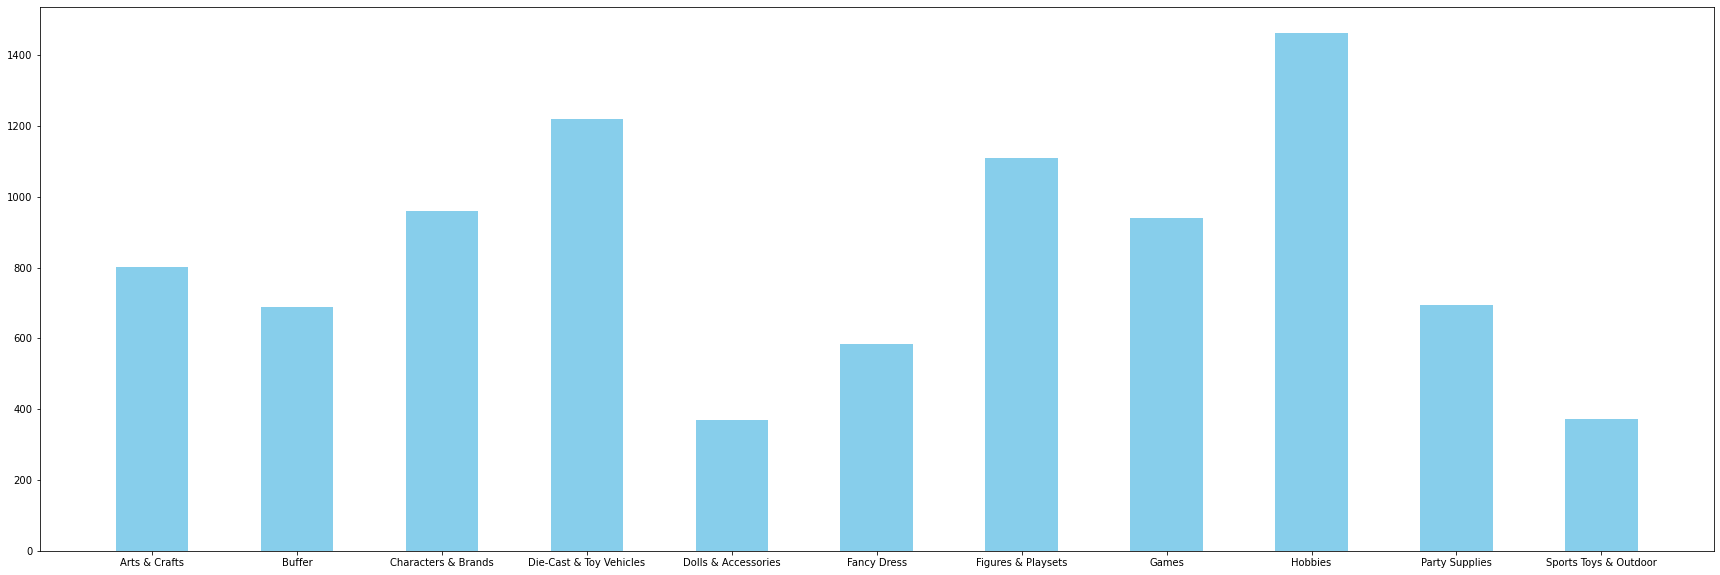

In [89]:
plt.figure(figsize=(30,10))
for i in sorted(freq2):
    print(i,freq2[i])
    if(freq2[i]>300):
        plt.bar(i, freq2[i], color='skyblue',width=0.5)